Simulated data (training data)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample features (area in m², floor number)
X_raw = np.array([
    [50, 1],
    [60, 2],
    [70, 3],
    [80, 4],
    [90, 5]
])

# Sample labels (house price in ten-thousands)
y = np.array([200, 240, 300, 360, 420]).reshape(-1, 1)

# Add bias column (constant 1) ⇒ X becomes n × (d+1)
X = np.hstack([X_raw, np.ones((X_raw.shape[0], 1))])

Initialization and hyperparameter setup

In [9]:
# Initialize weights (including bias)
w = np.zeros((X.shape[1], 1))  # 3 × 1 vector (2 features + 1 bias)

# Hyperparameters
learning_rate = 1e-5
epochs = 1000

# tore loss history
loss_history = []

Gradient descent main loop

In [10]:
for epoch in range(epochs):
    # Prediction: y_hat = Xw
    y_pred = X @ w

    # Error: true value - prediction
    error = y - y_pred

    # Loss function (mean squared error)
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    # Compute gradient: ∇w = -2/n * X^T @ (y - y_hat)
    grad = -2 / X.shape[0] * X.T @ error

    # Update weights
    w -= learning_rate * grad

    # Logging
    if epoch % 100 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch:4d}, Loss = {loss:.4f}")

Epoch    0, Loss = 98720.0000
Epoch  100, Loss = 329.8712
Epoch  200, Loss = 329.0792
Epoch  300, Loss = 328.2893
Epoch  400, Loss = 327.5016
Epoch  500, Loss = 326.7159
Epoch  600, Loss = 325.9323
Epoch  700, Loss = 325.1508
Epoch  800, Loss = 324.3714
Epoch  900, Loss = 323.5940
Epoch  999, Loss = 322.8265


Visualization of training process (loss descent curve)

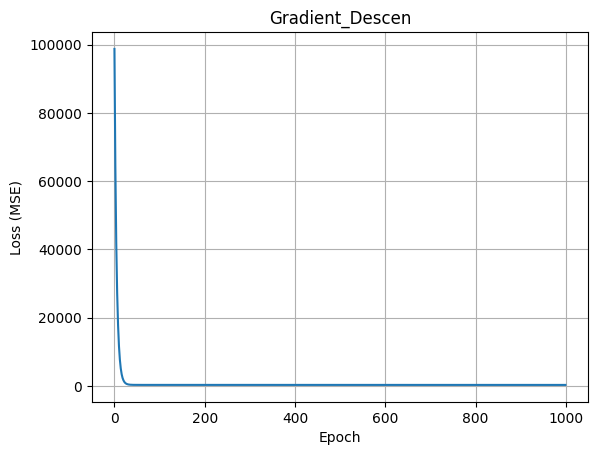

In [11]:
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Gradient_Descen")
plt.grid(True)
plt.show()

Output final model parameters

In [15]:
feature_names = ["Area", "Floor", "Bias"]
for name, coef in zip(feature_names, w.flatten()):
    print(f"Weight of {name}: {coef:.4f}")

Weight of Area: 4.3712
Weight of Floor: 0.4691
Weight of Bias: -0.0080


Simulate a new house: area=75㎡, floor=3

In [16]:
x_new = np.array([75, 3, 1])  # include bias term
predicted_price = x_new @ w
print(f"\nPredicted price (75㎡, 3rd floor): {predicted_price[0]:.2f} ten-thousands")


Predicted price (75㎡, 3rd floor): 329.24 ten-thousands


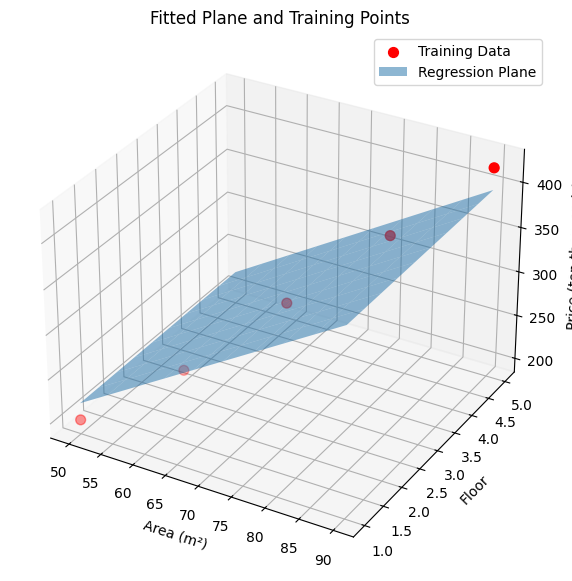

In [17]:
"""Visualization of fitted plane and training points"""

from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid for area and floor
area_range = np.linspace(X_raw[:,0].min(), X_raw[:,0].max(), 10)
floor_range = np.linspace(X_raw[:,1].min(), X_raw[:,1].max(), 10)
area_grid, floor_grid = np.meshgrid(area_range, floor_range)

# Stack the grid into (N, 3) shape for prediction (add bias term)
X_grid = np.c_[area_grid.ravel(), floor_grid.ravel(), np.ones(area_grid.size)]
y_grid = X_grid @ w
y_grid = y_grid.reshape(area_grid.shape)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot original data points
ax.scatter(X_raw[:,0], X_raw[:,1], y.flatten(), color='red', label='Training Data', s=50)

# Plot regression plane
ax.plot_surface(area_grid, floor_grid, y_grid, alpha=0.5, edgecolor='none', label='Regression Plane')

# Labels
ax.set_xlabel('Area (m²)')
ax.set_ylabel('Floor')
ax.set_zlabel('Price (ten-thousands)')
ax.set_title('Fitted Plane and Training Points')
ax.legend()

plt.show()
